In [1]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD
import numpy as np

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_vgg = VGG16(False, input_shape=(320,240,3))
for layer in model_vgg.layers:
    layer.trainable = False

In [3]:
model = Flatten()(model_vgg.output)
model = Dense(1, activation='sigmoid')(model)

In [4]:
model_vgg_pre = Model(inputs = model_vgg.input, outputs=model)
# model_vgg_pre.summary()

In [5]:
sgd = SGD(lr=0.05, decay=1e-5)
model_vgg_pre.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
data = np.load('data.npz')
x = data['x']
y = data['y']
data.close()

In [7]:
model_vgg_pre.fit(x, y, 32, 10, validation_split=0.3)

Train on 1020 samples, validate on 438 samples
Epoch 1/10
1020/1020 [==============================] - 25s 24ms/step - loss: 3.8071 - acc: 0.7500 - val_loss: 3.7138 - val_acc: 0.7671
Epoch 2/10
1020/1020 [==============================] - 20s 19ms/step - loss: 3.3604 - acc: 0.7892 - val_loss: 3.7138 - val_acc: 0.7671
Epoch 3/10
1020/1020 [==============================] - 20s 19ms/step - loss: 3.3604 - acc: 0.7892 - val_loss: 3.7138 - val_acc: 0.7671
Epoch 4/10
1020/1020 [==============================] - 20s 19ms/step - loss: 3.3604 - acc: 0.7892 - val_loss: 3.7138 - val_acc: 0.7671
Epoch 5/10
1020/1020 [==============================] - 20s 19ms/step - loss: 3.3604 - acc: 0.7892 - val_loss: 3.7138 - val_acc: 0.7671
Epoch 6/10
1020/1020 [==============================] - 20s 19ms/step - loss: 3.3604 - acc: 0.7892 - val_loss: 3.7138 - val_acc: 0.7671
Epoch 7/10
1020/1020 [==============================] - 20s 19ms/step - loss: 3.3604 - acc: 0.7892 - val_loss: 3.7138 - val_acc: 0.7671
E

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
im = x[399]

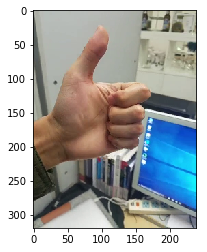

In [11]:
plt.imshow(im)

In [14]:
im = np.expand_dims(im, axis=0)

In [15]:
model_vgg_pre.predict(im)

array([[1.]], dtype=float32)

In [16]:
model_vgg_pre.__doc__

'The `Model` class adds training & evaluation routines to a `Container`.\n    '

In [17]:
model_vgg_pre.save('my_model.h5')